In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [28]:
df = pd.read_csv("data/stockprices.csv")
df.head()

df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year

### Moving Average plot

In [32]:
import numpy as np

In [ ]:
np.arange()

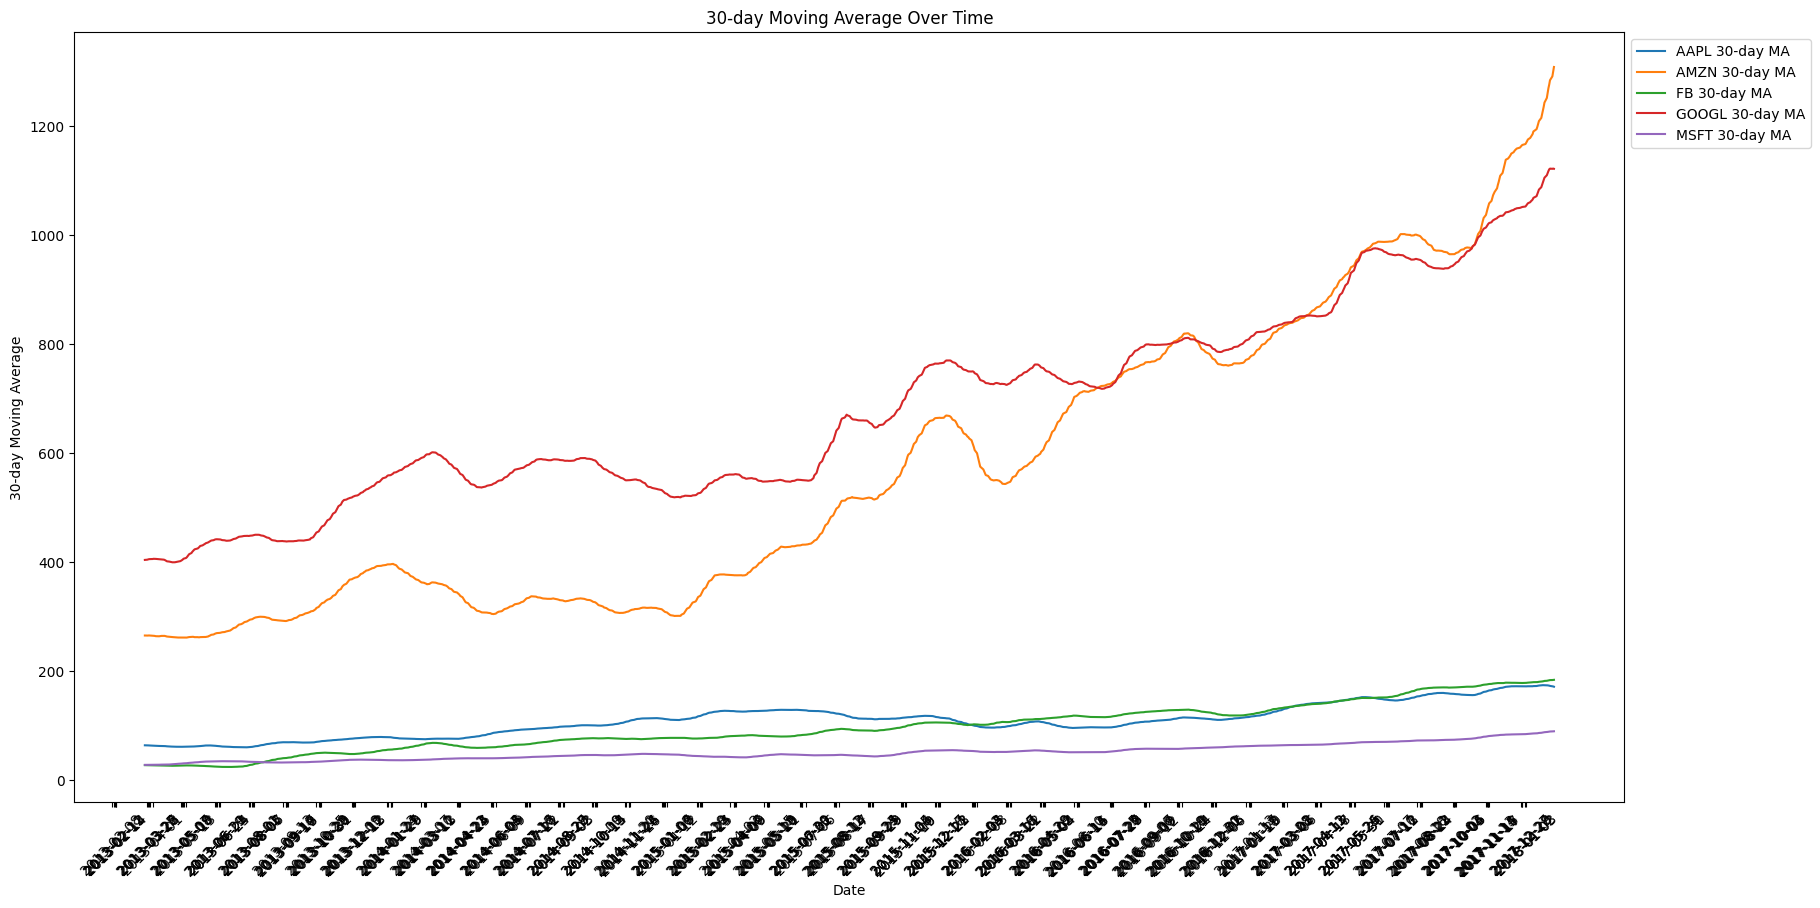

In [31]:
WINDOW_SIZE = 30
plt.figure(figsize=(20, 10))

grouped = df.groupby('Name')

df['moving_average'] = grouped['close'].transform(lambda x: x.rolling(window=WINDOW_SIZE).mean())


for name, group in df.groupby('Name'):
    plt.plot(group['date'], group['moving_average'], label=f'{name} {WINDOW_SIZE}-day MA')
    
plt.xticks(df['date'][::30], rotation=45)

plt.xlabel('Date')
plt.ylabel(f'{WINDOW_SIZE}-day Moving Average')
plt.title(f'{WINDOW_SIZE}-day Moving Average Over Time')
# plt.legend()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

- The growth rate of companies `Amazon` and `Google` is increasing exponentially.
- The growth rate of other has plateaued.

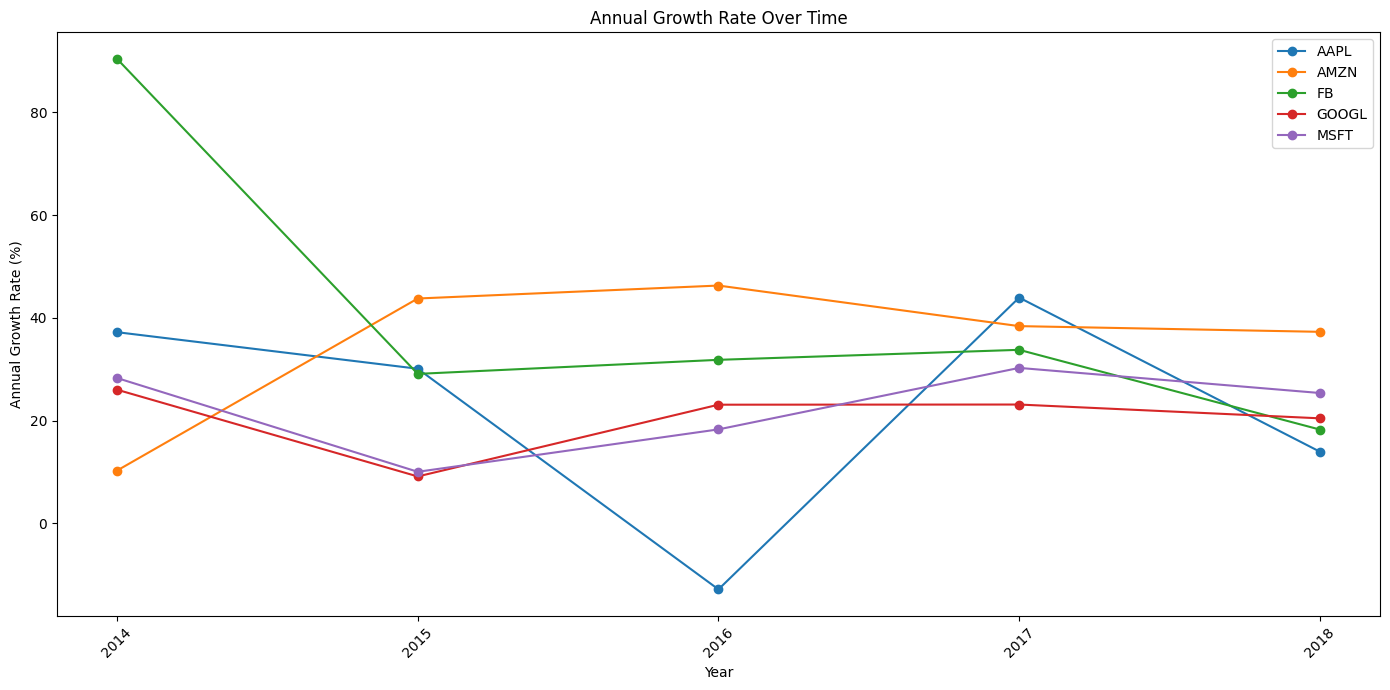

In [27]:


annual_mean = df.groupby(['Name', 'year'])['close'].mean().reset_index()

annual_mean['growth_rate'] = annual_mean.groupby('Name')['close'].pct_change() * 100

annual_mean = annual_mean.dropna()

plt.figure(figsize=(14, 7))

for name in annual_mean['Name'].unique():
    data = annual_mean[annual_mean['Name'] == name]
    plt.plot(data['year'], data['growth_rate'], marker='o', label=name)

plt.xticks(annual_mean['year'].unique(), rotation=45)

plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.title('Annual Growth Rate Over Time')

plt.legend()

plt.tight_layout()
plt.show()

- Annual growth rate for all companies expect Apple seems constant after 2017
- Growth rate of Apple is fluctuating

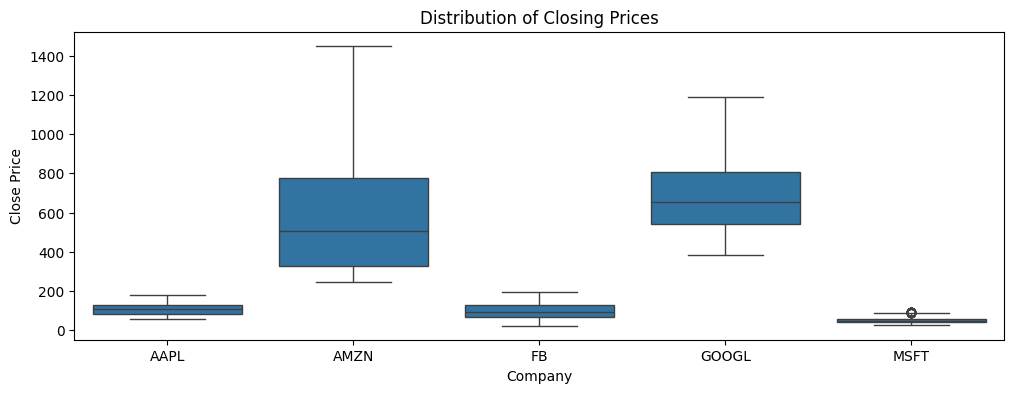

In [19]:

plt.figure(figsize=(12, 4))
sns.boxplot(x='Name', y='close', data=df)
plt.xlabel('Company')
plt.ylabel('Close Price')
plt.title('Distribution of Closing Prices')
plt.show()

- This shows, Amazon had the highest closing price for some period and Google has average highest closing price.

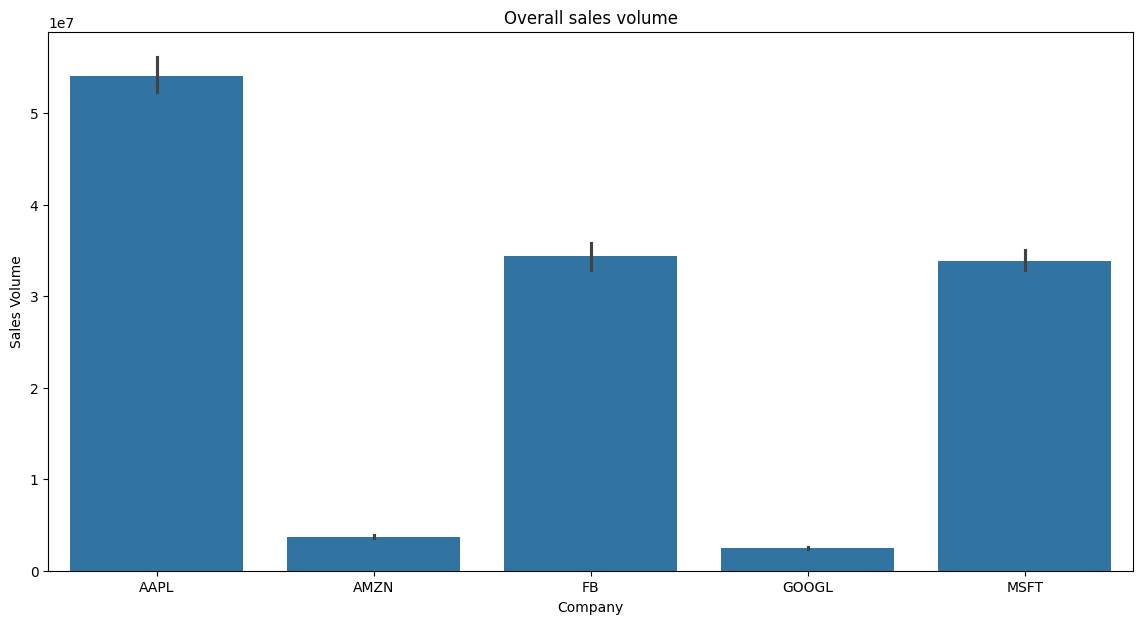

In [24]:

plt.figure(figsize=(14, 7))
sns.barplot(x='Name', y='volume', data=df)
plt.xlabel('Company')
plt.ylabel('Sales Volume')
plt.title('Overall sales volume')
plt.show()

- Apple has high sales volume but growth rate is fluctuating. 

In [43]:

plt.figure(figsize=(20,10))
for name, group in df.groupby('Name'):
    plt.plot(df['date'], df['close'])
    
plt.xticks(np.arange(1,len(df),step=0.2),rotation=45)

plt.xlabel('Date')
plt.show()

KeyboardInterrupt: 

([<matplotlib.axis.XTick at 0x7f7916d67590>,
 [Text(0.0, 0, '1970-01-01'),
  Text(0.2, 0, '1970-01-01'),
  Text(0.4, 0, '1970-01-01'),
  Text(0.6000000000000001, 0, '1970-01-01'),
  Text(0.8, 0, '1970-01-01')])

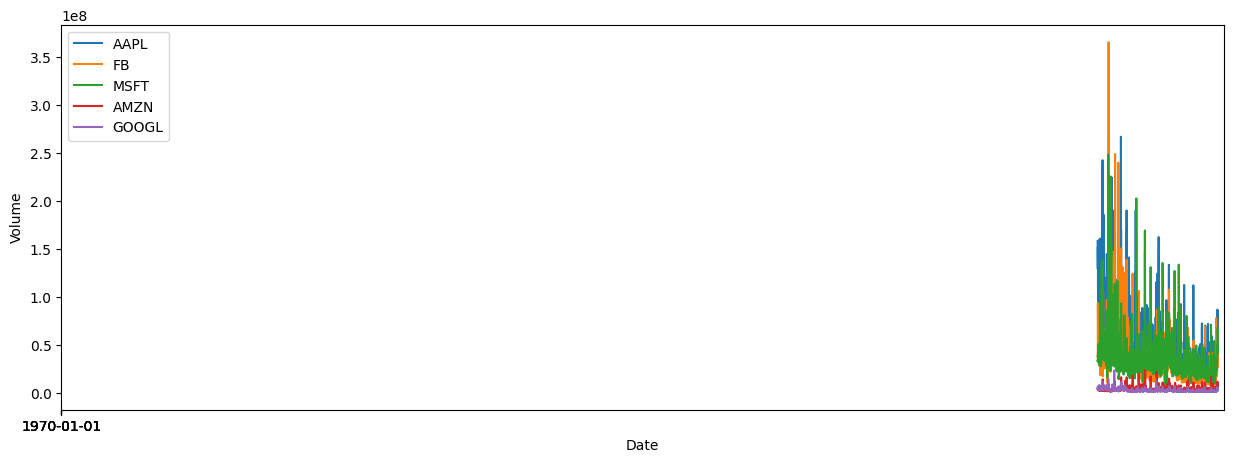

In [38]:
import numpy as np

fig,ax=plt.subplots(figsize=(15,5))
ax.plot(df[df['Name']=='AAPL']['date'],df[df['Name']=='AAPL']['volume'], label="AAPL")
ax.plot(df[df['Name']=='FB']['date'],df[df['Name']=='FB']['volume'], label="FB")
ax.plot(df[df['Name']=='MSFT']['date'],df[df['Name']=='MSFT']['volume'], label="MSFT")
ax.plot(df[df['Name']=='AMZN']['date'],df[df['Name']=='AMZN']['volume'], label="AMZN")
ax.plot(df[df['Name']=='GOOGL']['date'],df[df['Name']=='GOOGL']['volume'], label="GOOGL")
ax.set_xlabel("Date")
ax.set_ylabel("Volume")
ax.legend()
plt.xticks(np.arange(0,1,step=0.2))